# NBA Trends Project

*Analyzing National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, I analyzed data from the NBA (National Basketball Association) and explored possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project I've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

I subset the data into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014).

Here I am going to compare the knicks to the nets with respect to points earned per game.

In [5]:
# Using the pts column from the nba_2010 DataFrame, I created two series named knicks_pts (fran_id = "Knicks") and 
# nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.

knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']

print(knicks_pts)
print(nets_pts)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64


I calculated the difference between the two teams’ average points scored.

In [6]:
knicks_pts_mean = np.mean(knicks_pts)
nets_pts_mean = np.mean(nets_pts)
    
    
diff_means_2010 = knicks_pts_mean - nets_pts_mean
print(diff_means_2010)

9.731707317073173


Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Therefore, I created a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets.

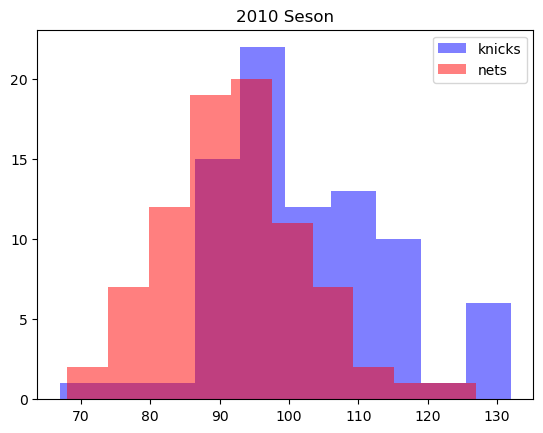

In [7]:
plt.hist(knicks_pts, alpha = 0.5, label = 'knicks', color = 'blue')
plt.hist(nets_pts, alpha = 0.5, label = 'nets', color = 'red')
plt.title('2010 Seson')
plt.legend()
plt.show()

I repeated the steps for the 2014 data.

In [8]:
knicks_pts_2014 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_2014 = nba_2014.pts[nba_2014.fran_id == 'Nets']

knicks_pts_mean_2014 = np.mean(knicks_pts_2014)
nets_pts_mean_2014 = np.mean(nets_pts_2014)
    
    
diff_means_2014 = knicks_pts_mean_2014 - nets_pts_mean_2014
print(diff_means_2014)

0.44706798131809933


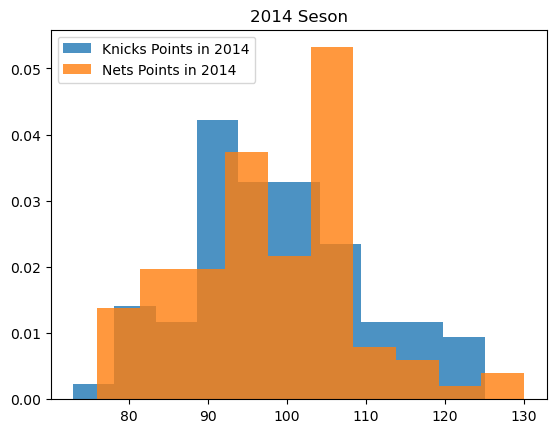

<Figure size 640x480 with 0 Axes>

In [9]:
plt.hist(knicks_pts_2014, alpha=0.8, label='knicks', density = True)
plt.hist(nets_pts_2014, alpha=0.8, label='knicks', density = True)
plt.title('2014 Seson')
plt.legend(['Knicks Points in 2014', 'Nets Points in 2014'])
plt.show()
plt.clf()

For the remainder of this project, I focused on data from 2010. I included all teams in the dataset and investigated the relationship between franchise and points scored per game.


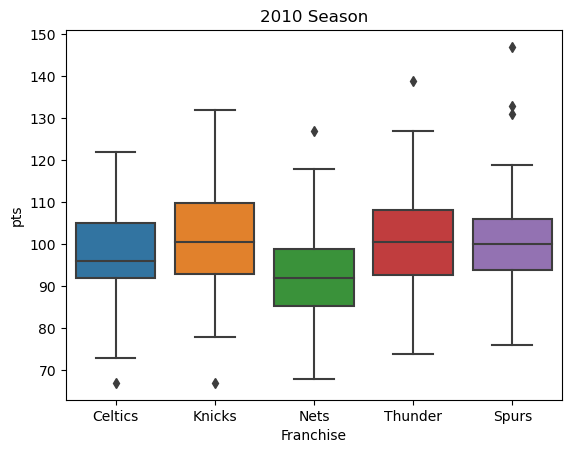

In [10]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.title('2010 Season')
plt.xlabel('Franchise')
plt.show()

At this point I was interested in whether teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

To determine if categorical variables are associated I calculated a table of frequencies that shows the counts of game_result and game_location.


In [11]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [12]:
location_result_prop = location_result_freq/len(nba_2010)
print(location_result_prop)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


Using the contingency table created above (Task 6), I calculated the expected contingency table (if there were no association) and the Chi-Square statistic.

In [13]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We've exceeded that!*

For each game, 538 has calculated the probability that each team will win the game. I wanted to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, I calculated the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset.


In [14]:
cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(np.cov(nba_2010.forecast, nba_2010.point_diff)[0][1])

1.3746125676458794


Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, I calculated the correlation between `forecast` and `point_diff`.

In [15]:
point_diff_forecast_corr, p  = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

0.4402088708468084




I then generated a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis).

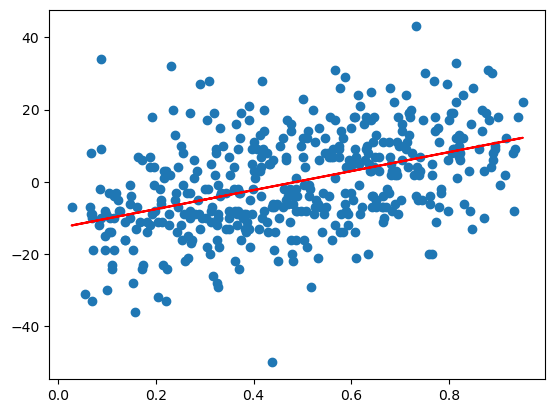

In [16]:
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
a, b = np.polyfit(nba_2010.forecast, nba_2010.point_diff, 1)
plt.plot(nba_2010.forecast, a*nba_2010.forecast+b, color = 'red')